In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [5]:
# read in data
df = pd.read_csv("C:/Data Science/data/raw/Youtube/Biden_youtube.csv")

In [ ]:
df.info()

In [4]:
df['Comment'].values[101]

'As a Georgian 🇺🇸 , I say free Palestine 🇵🇸!'

In [5]:
print(df.shape)

(2441, 13)


In [16]:
df_posts = df.drop_duplicates(subset='ID', keep='first')
df_posts = df_posts.reset_index(drop=True)

In [18]:
df_posts.head(2)

,ID,Title,Author,Date Uploaded,Views,Likes_x,Subscriber Count,VideoID,AuthorChannelId,PublishedAt,Comment,Likes_y,Country,NewID
0,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCorbkByY_6Uh11bxTBp4jWA,2024-03-17T01:35:05Z,Lets be honest there's absolutely no chance he...,372.0,Unknown,1
1,DQsaiQVnJ4o,Biden has grown angry and anxious about re-ele...,NBC News,2024-03-17T20:00:04Z,5518,78,9750000,DQsaiQVnJ4o,UCnpZwcZRUWc8As4qoxArAQg,2024-03-18T00:38:29Z,Can these people be anymore in the bag for sen...,107.0,Unknown,51


In [19]:
df_posts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                50 non-null     object 
 1   Title             50 non-null     object 
 2   Author            50 non-null     object 
 3   Date Uploaded     50 non-null     object 
 4   Views             50 non-null     int64  
 5   Likes_x           50 non-null     int64  
 6   Subscriber Count  50 non-null     int64  
 7   VideoID           49 non-null     object 
 8   AuthorChannelId   49 non-null     object 
 9   PublishedAt       49 non-null     object 
 10  Comment           49 non-null     object 
 11  Likes_y           49 non-null     float64
 12  Country           49 non-null     object 
 13  NewID             50 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 5.6+ KB


NTLK

In [3]:
example = df['Comment'][37]
print(example)

Pauline is absolutely right, the businesses and the healthcare aren’t hiring people for their qualifications and their skills anymore, as the result of that the people are suffering.


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Pauline',
 'is',
 'absolutely',
 'right',
 ',',
 'the',
 'businesses',
 'and',
 'the',
 'healthcare']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Pauline', 'NNP'),
 ('is', 'VBZ'),
 ('absolutely', 'RB'),
 ('right', 'JJ'),
 (',', ','),
 ('the', 'DT'),
 ('businesses', 'NNS'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('healthcare', 'NN')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Pauline/NNP)
  is/VBZ
  absolutely/RB
  right/JJ
  ,/,
  the/DT
  businesses/NNS
  and/CC
  the/DT
  healthcare/NN
  aren/VBZ
  ’/JJ
  t/NN
  hiring/VBG
  people/NNS
  for/IN
  their/PRP$
  qualifications/NNS
  and/CC
  their/PRP$
  skills/NNS
  anymore/RB
  ,/,
  as/IN
  the/DT
  result/NN
  of/IN
  that/IN
  the/DT
  people/NNS
  are/VBP
  suffering/VBG
  ./.)


VADER - Valence Aware Dictionary and Senitment Reasoner

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [5]:
sia.polarity_scores('I Am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('Gosh this is so bad!')

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.6988}

In [17]:
example

'Pauline is absolutely right, the businesses and the healthcare aren’t hiring people for their qualifications and their skills anymore, as the result of that the people are suffering.'

In [18]:
sia.polarity_scores(example)

{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.4767}

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2441 non-null   object 
 1   Title             2441 non-null   object 
 2   Author            2441 non-null   object 
 3   Date Uploaded     2441 non-null   object 
 4   Views             2441 non-null   int64  
 5   Likes_x           2441 non-null   int64  
 6   Subscriber Count  2441 non-null   int64  
 7   VideoID           2440 non-null   object 
 8   AuthorChannelId   2440 non-null   object 
 9   PublishedAt       2440 non-null   object 
 10  Comment           2440 non-null   object 
 11  Likes_y           2440 non-null   float64
 12  Country           2440 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 248.0+ KB


In [7]:
df['NewID'] = range(1, len(df) + 1)
df.head(3)

,ID,Title,Author,Date Uploaded,Views,Likes_x,Subscriber Count,VideoID,AuthorChannelId,PublishedAt,Comment,Likes_y,Country,NewID
0,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCorbkByY_6Uh11bxTBp4jWA,2024-03-17T01:35:05Z,Lets be honest there's absolutely no chance he...,372.0,Unknown,1
1,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCpPU8A662t9miiSqGgj7-5A,2024-03-17T02:24:37Z,No Ice Cream and Pudding. Federal Prison. he ...,283.0,US,2
2,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCZd4pYDviJZkjdM9RVEXlDA,2024-03-17T05:26:02Z,"When they call him “Mr. President”, it makes m...",113.0,Unknown,3


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

res = {}
for i, row in df.iterrows():
    text = str(row['Comment'])
    if text in ['nan', '']:
        continue
    new_id = row['NewID']  # Use the new unique identifier
    res[new_id] = sia.polarity_scores(text)

# Now 'res' will have unique keys for each row based on 'NewID'


In [6]:
res

{1: {'neg': 0.09, 'neu': 0.712, 'pos': 0.198, 'compound': 0.6751},
 2: {'neg': 0.405, 'neu': 0.508, 'pos': 0.087, 'compound': -0.8816},
 3: {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.3612},
 4: {'neg': 0.252, 'neu': 0.566, 'pos': 0.182, 'compound': -0.2732},
 5: {'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7574},
 6: {'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.5563},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.7783},
 9: {'neg': 0.694, 'neu': 0.306, 'pos': 0.0, 'compound': -0.7783},
 10: {'neg': 0.273, 'neu': 0.636, 'pos': 0.091, 'compound': -0.6784},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9231},
 14: {'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compound': 0.4749},
 15: {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.807},
 16: {'neg': 0

In [5]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.090,0.712,0.198,0.6751
2,0.405,0.508,0.087,-0.8816
3,0.143,0.857,0.000,-0.3612
4,0.252,0.566,0.182,-0.2732
5,0.371,0.629,0.000,-0.7574
...,...,...,...,...
2437,0.000,1.000,0.000,0.0000
2438,0.000,1.000,0.000,0.0000
2439,0.000,1.000,0.000,0.0000
2440,0.000,1.000,0.000,0.0000


In [9]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'NewID'})
vaders = vaders.merge(df, how='left')

In [8]:
vaders.head(3)

,NewID,neg,neu,pos,compound,ID,Title,Author,Date Uploaded,Views,Likes_x,Subscriber Count,VideoID,AuthorChannelId,PublishedAt,Comment,Likes_y,Country
0,1,0.090,0.712,0.198,0.6751,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCorbkByY_6Uh11bxTBp4jWA,2024-03-17T01:35:05Z,Lets be honest there's absolutely no chance he...,372.0,Unknown
1,2,0.405,0.508,0.087,-0.8816,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCpPU8A662t9miiSqGgj7-5A,2024-03-17T02:24:37Z,No Ice Cream and Pudding. Federal Prison. he ...,283.0,US
2,3,0.143,0.857,0.000,-0.3612,0Bfu793FPF4,Sky News host mocks Joe Biden’s ‘mental facult...,Sky News Australia,2024-03-17T01:29:20Z,234066,9505,3960000,0Bfu793FPF4,UCZd4pYDviJZkjdM9RVEXlDA,2024-03-17T05:26:02Z,"When they call him “Mr. President”, it makes m...",113.0,Unknown


In [11]:
print(df['Title'].unique())

['Sky News host mocks Joe Biden’s ‘mental faculties’'
 'Biden has grown angry and anxious about re-election campaign: Panel'
 'US President Joe Biden interrupted by a pro-Palestine protester during a rally in Georgia'
 'Trump leads Biden in support among Hispanic voters, according to new poll'
 'President Biden Meets Harry | Biden-Harris 2024'
 'Trump STILL having PANIC ATTACK over Biden Speech'
 'Mark Levin: The goal is to imprison Trump so Biden has a clear field'
 'President Biden and Vice President Harris Clinch the Democratic Nomination | Biden-Harris 2024'
 'Biden effigy kicked by Republicans at Kansas fundraising event'
 'Blinken’s intense focus during Biden speech goes viral'
 "Biden: 'Those overturning Roe v. Wade have no clue about the power of women'"
 'President #Biden falls during U.S. #AirForceAcademy #graduation'
 'Joe Biden Said What Now??'
 "'Do you think Biden could do that?': Trump mocks U.S President"
 '"I don\'t care if you think I\'m Satan reincarnated": Biden #sh

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  func(*args, **kwargs)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


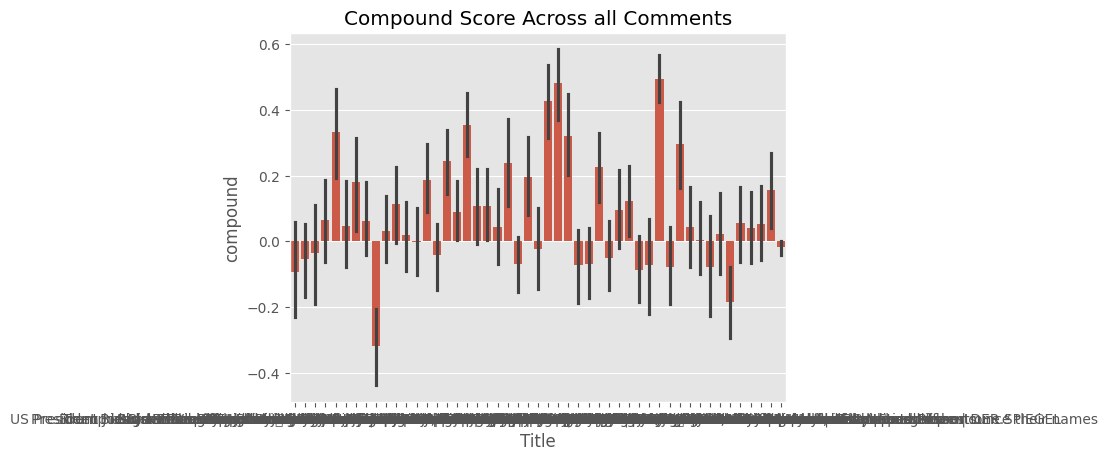

In [13]:
ax = sns.barplot(data=vaders, x = 'Title', y = 'compound')
ax.set_title('Compound Score Across all Comments')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  func(*args, **kwargs)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\aadon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


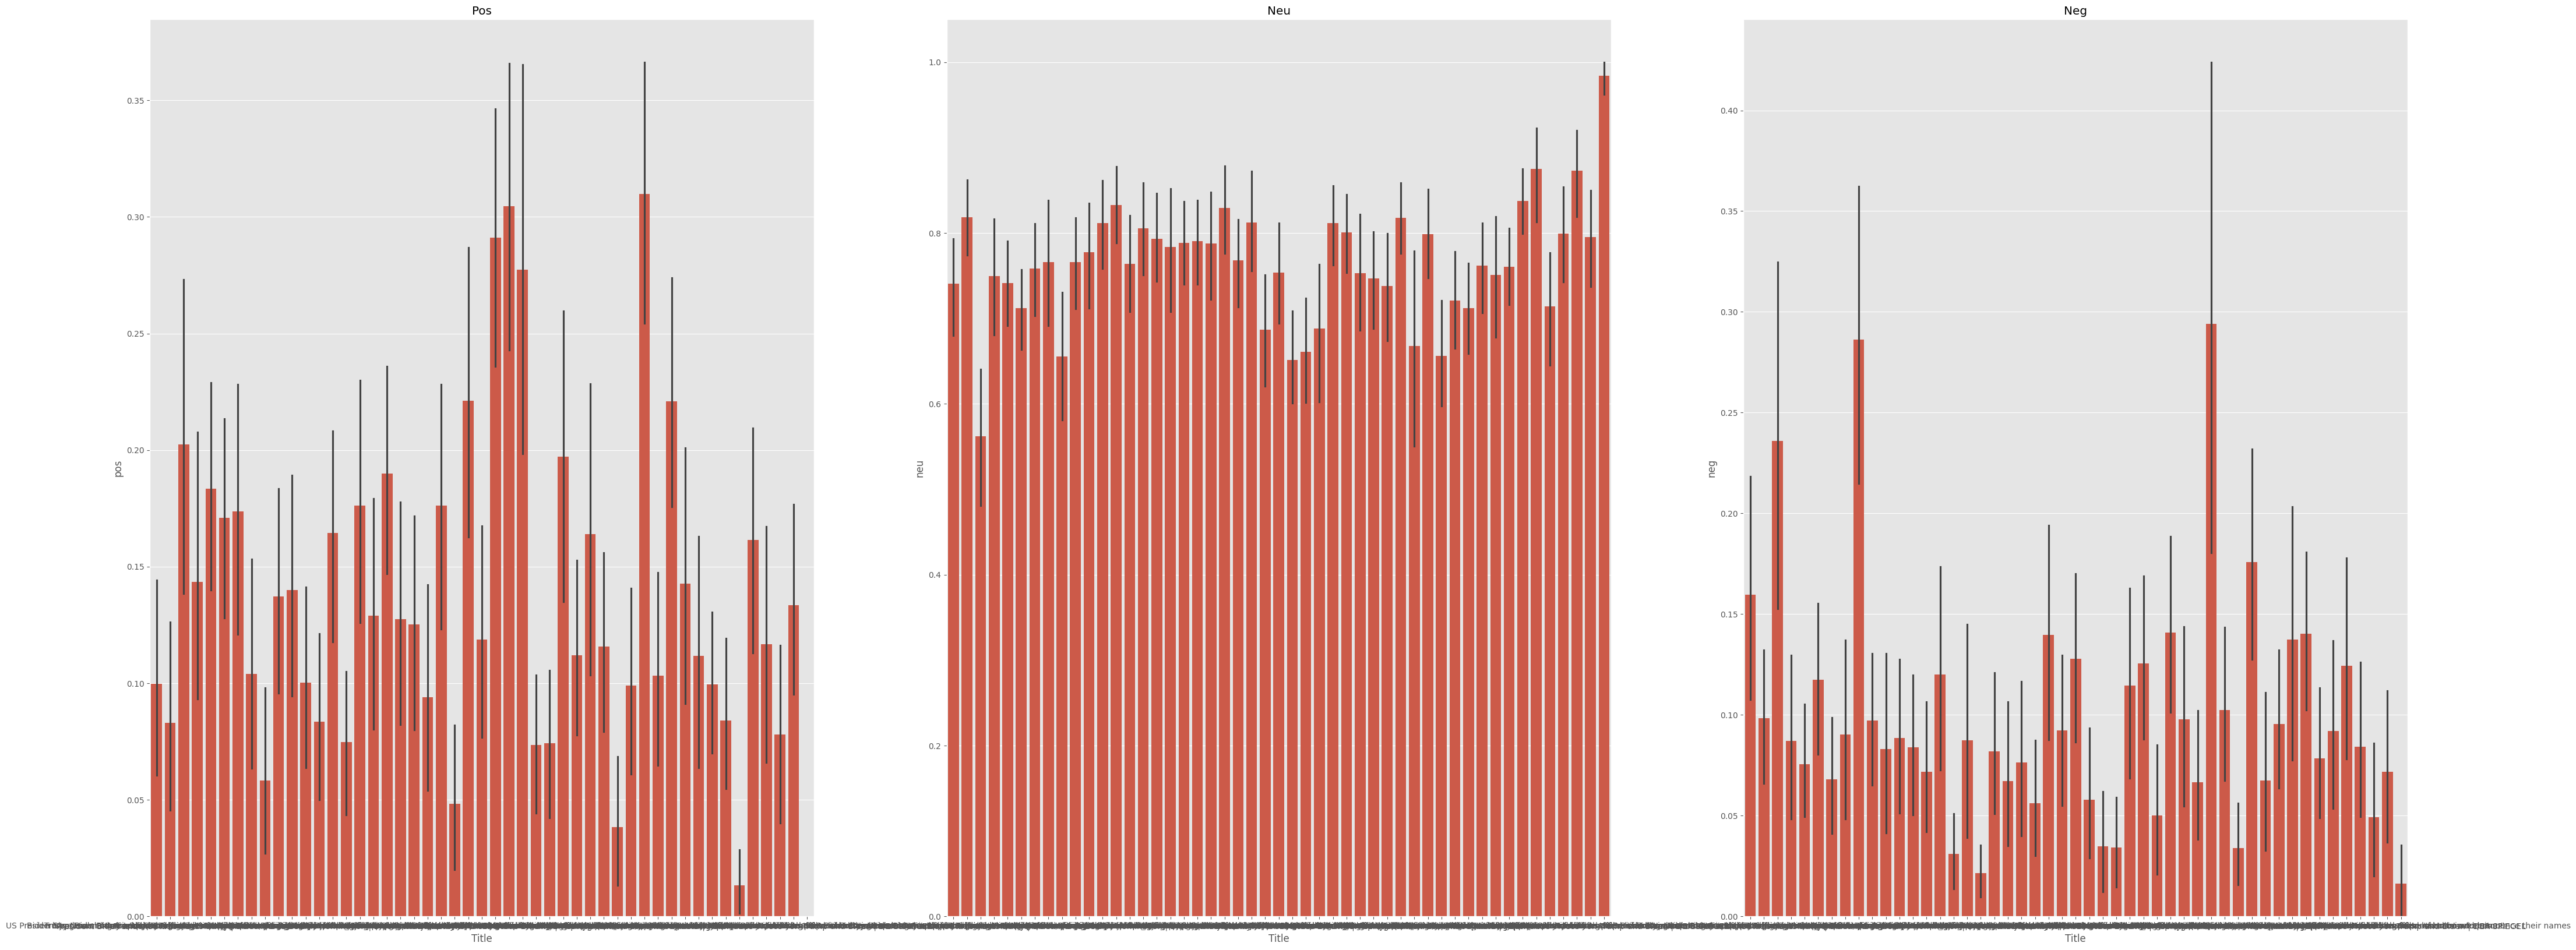

In [14]:
fig, axs = plt.subplots(1,3, figsize=(50,20))
sns.barplot(data=vaders, x='Title', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Title', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Title', y='neg', ax=axs[2])
axs[0].set_title('Pos')
axs[1].set_title('Neu')
axs[2].set_title('Neg')
plt.show


In [10]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [11]:
# For TensorFlow
import tensorflow as tf
import torch



In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# Move the model to GPU
if torch.cuda.is_available():
    model.cuda()

In [ ]:
print(example)
sia.polarity_scores(example)

In [ ]:
#Run on roberta model
encoded_comment = tokenizer(example, return_tensors='pt')
output = model(**encoded_comment)
scores = output[0][0].detach().numpy()
score = softmax(scores)
scores

In [ ]:
#Run on roberta model
encoded_comment = tokenizer(example, return_tensors='pt')
output = model(**encoded_comment)
scores = output[0][0].detach().numpy()
score = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
print(scores_dict)

In [13]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [28]:
from tqdm import tqdm

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try: #for text too large
        text = row['Comment']
        # Convert to string in case of NaN or float
        text = str(text) if pd.notnull(text) else ""
        myid = row['NewID']
        if text:  # Proceed only if text is not empty
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res[myid] = both
    except RuntimeError as e:
        print(f'Broke for id {myid}: {str(e)}')


  9%|▉         | 222/2441 [00:02<00:25, 88.02it/s]

Broke for id 215: The expanded size of the tensor (673) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 673].  Tensor sizes: [1, 514]


100%|██████████| 2441/2441 [00:26<00:00, 93.34it/s]


In [26]:
# Move model to GPU once at initialization if CUDA is available
if torch.cuda.is_available():
    model.cuda()


In [25]:
def polarity_scores_roberta(example):
    # Tokenize the input text; this is where encoded_text is defined
    encoded_text = tokenizer(example, return_tensors='pt')
    
    # Check if a GPU is available and move the encoded text to GPU
    if torch.cuda.is_available():
        encoded_text = encoded_text.to('cuda')  # Move encoded text to the same device as the model
        
        # Ensure the model is on GPU. This line should ideally be outside this function,
        # so you don't move the model to GPU every time you call this function, 
        # but for completeness, it's shown here.
        model.cuda()
    
    # Perform the prediction
    output = model(**encoded_text)
    
    # Detach the output and move it back to CPU for further processing with NumPy
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    
    # Construct the scores dictionary
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    
    return scores_dict


In [ ]:
import torch
print(torch.cuda.is_available())


In [19]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. GPU support enabled.")
    # Setting the default device to GPU
    torch.cuda.set_device(0)  # Assuming you want to use the first GPU
else:
    print("CUDA not available. Running on CPU.")


CUDA is available. GPU support enabled.


In [3]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


RuntimeError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
import tensorflow as tf


In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0
